En este notebook vamos a verificar la correlación de los datos para visualizar la relación entre las variables.

## Librerías

In [11]:
import pandas as pd
import numpy as np
import os
from pathlib import PurePath
import matplotlib.pyplot as plt
import seaborn as sns

## Carga de datos

Modelados

In [17]:
z21_path_m = r"../../data_analysis\all_vars\zafra2021"
z22_path_m = r"../../data_analysis\all_vars\zafra2022"
z23_path_m = r"../../data_analysis\all_vars\zafra2023"

Reales

In [18]:
z21_path_r = r"../../datos/parcelas/ready_to_analyze/zafra2021/"
z22_path_r = r"../../datos/parcelas/ready_to_analyze/zafra2022/"
z23_path_r = r"../../datos/parcelas/ready_to_analyze/zafra2023/"

In [19]:
dfs_21_m = [(pd.read_csv(PurePath(z21_path_m, f), parse_dates=True), int(f.split('.')[0].split('_')[1])) for f in os.listdir(z21_path_m) if f.endswith(".csv")]
dfs_22_m = [(pd.read_csv(PurePath(z22_path_m, f), parse_dates=True), int(f.split('.')[0].split('_')[1])) for f in os.listdir(z22_path_m) if f.endswith(".csv")]
dfs_23_m = [(pd.read_csv(PurePath(z23_path_m, f), parse_dates=True), int(f.split('.')[0].split('_')[1])) for f in os.listdir(z23_path_m) if f.endswith(".csv")]
dfs_21_r = [(pd.read_csv(PurePath(z21_path_r, f), parse_dates=True), int(f.split('.')[0].split('_')[1])) for f in os.listdir(z21_path_r) if f.endswith(".csv")]
dfs_22_r = [(pd.read_csv(PurePath(z22_path_r, f), parse_dates=True), int(f.split('.')[0].split('_')[1])) for f in os.listdir(z22_path_r) if f.endswith(".csv")]
dfs_23_r = [(pd.read_csv(PurePath(z23_path_r, f), parse_dates=True), int(f.split('.')[0].split('_')[1])) for f in os.listdir(z23_path_r) if f.endswith(".csv")]

### Estructura de los datos

In [20]:
zafra2021_r = pd.DataFrame(columns=[
    'parcela',
    'ndvi_max',
    'ndvi_max_date',
    'ndvi_mean',
    'gndvi_max',
    'gndvi_max_date',
    'gndvi_mean',
    'cire_max',
    'cire_mean',
    'ndre1_max',
    'ndre1_mean',
    'msi_mean'
])

zafra2021_m = pd.DataFrame(columns=[
    'parcela',
    'ndvi_max',
    'ndvi_mean',
    'ndvi_max_date',
    'gndvi_max',
    'gndvi_mean',
    'gndvi_max_date',
    'cire_max',
    'cire_mean',
    'ndre1_max',
    'ndre1_mean',
    'msi_mean',
    'lluvia_acum',
    'etc_acum'
])

zafra2022_r = pd.DataFrame(columns=[
    'parcela',
    'ndvi_max',
    'ndvi_max_date',
    'ndvi_mean',
    'gndvi_max',
    'gndvi_max_date',
    'gndvi_mean',
    'cire_max',
    'cire_mean',
    'ndre1_max',
    'ndre1_mean',
    'msi_mean'
])

zafra2022_m = pd.DataFrame(columns=[
    'parcela',
    'ndvi_max',
    'ndvi_mean',
    'ndvi_max_date',
    'gndvi_max',
    'gndvi_mean',
    'gndvi_max_date',
    'cire_max',
    'cire_mean',
    'ndre1_max',
    'ndre1_mean',
    'msi_mean',
    'lluvia_acum',
    'etc_acum'
])

zafra2023_r = pd.DataFrame(columns=[
    'parcela',
    'ndvi_max',
    'ndvi_max_date',
    'ndvi_mean',
    'gndvi_max',
    'gndvi_max_date',
    'gndvi_mean',
    'cire_max',
    'cire_mean',
    'ndre1_max',
    'ndre1_mean',
    'msi_mean'
])

zafra2023_m = pd.DataFrame(columns=[
    'parcela',
    'ndvi_max',
    'ndvi_mean',
    'ndvi_max_date',
    'gndvi_max',
    'gndvi_mean',
    'gndvi_max_date',
    'cire_max',
    'cire_mean',
    'ndre1_max',
    'ndre1_mean',
    'msi_mean',
    'lluvia_acum',
    'etc_acum'
])

In [21]:
for i in dfs_21_m:
    i[0]['Fecha'] = pd.to_datetime(i[0]['Fecha'])
    parcela_id = int(i[1])
    ndvi_max = i[0]['ndvi'].max()
    ndvi_max_date_loc = i[0]['ndvi'].idxmax()
    ndvi_max_date = i[0].loc[ndvi_max_date_loc, 'Fecha']
    ndvi_mean = i[0]['ndvi'].mean()
    gndvi_max = i[0]['gndvi'].max()
    gndvi_max_date_loc = i[0]['gndvi'].idxmax()
    gndvi_max_date = i[0].loc[gndvi_max_date_loc, 'Fecha']
    gndvi_mean = i[0]['gndvi'].mean()
    cire_max = i[0]['cire'].max()
    cire_mean = i[0]['cire'].mean()
    ndre1_max = i[0]['ndre1'].max()
    ndre1_mean = i[0]['ndre1'].mean()
    msi_mean = i[0]['msi'].mean()
    lluvia = i[0]['precip'].sum()
    etc_acum = i[0]['etc'].sum()
    
    
    zafra2021_m = zafra2021_m._append({
        'parcela': parcela_id,
        'ndvi_max': ndvi_max,
        'ndvi_max_date': ndvi_max_date,
        'ndvi_mean': ndvi_mean,
        'gndvi_max': gndvi_max,
        'gndvi_max_date': gndvi_max_date,
        'gndvi_mean': gndvi_mean,
        'cire_max': cire_max,
        'cire_mean': cire_mean,
        'ndre1_max': ndre1_max,
        'ndre1_mean': ndre1_mean,
        'msi_mean': msi_mean,
        'lluvia_acum': lluvia,
        'etc_acum': etc_acum
    }, ignore_index=True) 
    
    
for i in dfs_22_m:
    i[0]['Fecha'] = pd.to_datetime(i[0]['Fecha'])
    parcela_id = int(i[1])
    ndvi_max = i[0]['ndvi'].max()
    ndvi_max_date_loc = i[0]['ndvi'].idxmax()
    ndvi_max_date = i[0].loc[ndvi_max_date_loc, 'Fecha']
    ndvi_mean = i[0]['ndvi'].mean()
    gndvi_max = i[0]['gndvi'].max()
    gndvi_max_date_loc = i[0]['gndvi'].idxmax()
    gndvi_max_date = i[0].loc[gndvi_max_date_loc, 'Fecha']
    gndvi_mean = i[0]['gndvi'].mean()
    cire_max = i[0]['cire'].max()
    cire_mean = i[0]['cire'].mean()
    ndre1_max = i[0]['ndre1'].max()
    ndre1_mean = i[0]['ndre1'].mean()
    msi_mean = i[0]['msi'].mean()
    lluvia = i[0]['precip'].sum()
    etc_acum = i[0]['etc'].sum()
    
    
    zafra2022_m = zafra2022_m._append({
        'parcela': parcela_id,
        'ndvi_max': ndvi_max,
        'ndvi_max_date': ndvi_max_date,
        'ndvi_mean': ndvi_mean,
        'gndvi_max': gndvi_max,
        'gndvi_max_date': gndvi_max_date,
        'gndvi_mean': gndvi_mean,
        'cire_max': cire_max,
        'cire_mean': cire_mean,
        'ndre1_max': ndre1_max,
        'ndre1_mean': ndre1_mean,
        'msi_mean': msi_mean,
        'lluvia_acum': lluvia,
        'etc_acum': etc_acum
    }, ignore_index=True)

for i in dfs_23_m:
    i[0]['Fecha'] = pd.to_datetime(i[0]['Fecha'])
    parcela_id = int(i[1])
    ndvi_max = i[0]['ndvi'].max()
    ndvi_max_date_loc = i[0]['ndvi'].idxmax()
    ndvi_max_date = i[0].loc[ndvi_max_date_loc, 'Fecha']
    ndvi_mean = i[0]['ndvi'].mean()
    gndvi_max = i[0]['gndvi'].max()
    gndvi_max_date_loc = i[0]['gndvi'].idxmax()
    gndvi_max_date = i[0].loc[gndvi_max_date_loc, 'Fecha']
    gndvi_mean = i[0]['gndvi'].mean()
    cire_max = i[0]['cire'].max()
    cire_mean = i[0]['cire'].mean()
    ndre1_max = i[0]['ndre1'].max()
    ndre1_mean = i[0]['ndre1'].mean()
    msi_mean = i[0]['msi'].mean()
    lluvia = i[0]['precip'].sum()
    etc_acum = i[0]['etc'].sum()
    
    
    zafra2023_m = zafra2023_m._append({
        'parcela': parcela_id,
        'ndvi_max': ndvi_max,
        'ndvi_max_date': ndvi_max_date,
        'ndvi_mean': ndvi_mean,
        'gndvi_max': gndvi_max,
        'gndvi_max_date': gndvi_max_date,
        'gndvi_mean': gndvi_mean,
        'cire_max': cire_max,
        'cire_mean': cire_mean,
        'ndre1_max': ndre1_max,
        'ndre1_mean': ndre1_mean,
        'msi_mean': msi_mean,
        'lluvia_acum': lluvia,
        'etc_acum': etc_acum
    }, ignore_index=True)


for i in dfs_21_r:
    i[0]['Fecha'] = pd.to_datetime(i[0]['Fecha'])
    parcela_id = int(i[1])
    ndvi_max = i[0]['ndvi_mean'].max()
    ndvi_max_date_loc = i[0]['ndvi_mean'].idxmax()
    ndvi_max_date = i[0].loc[ndvi_max_date_loc, 'Fecha']
    ndvi_mean = i[0]['ndvi_max'].mean()
    gndvi_max = i[0]['gndvi_mean'].max()
    gndvi_max_date_loc = i[0]['gndvi_mean'].idxmax()
    gndvi_max_date = i[0].loc[gndvi_max_date_loc, 'Fecha']
    gndvi_mean = i[0]['gndvi_mean'].mean()
    cire_max = i[0]['cire_mean'].max()
    cire_mean = i[0]['cire_mean'].mean()
    ndre1_max = i[0]['ndre1_mean'].max()
    ndre1_mean = i[0]['ndre1_mean'].mean()
    msi_mean = i[0]['msi_mean'].mean()
    
    
    zafra2021_r = zafra2021_r._append({
        'parcela': parcela_id,
        'ndvi_max': ndvi_max,
        'ndvi_max_date': ndvi_max_date,
        'ndvi_mean': ndvi_mean,
        'gndvi_max': gndvi_max,
        'gndvi_max_date': gndvi_max_date,
        'gndvi_mean': gndvi_mean,
        'cire_max': cire_max,
        'cire_mean': cire_mean,
        'ndre1_max': ndre1_max,
        'ndre1_mean': ndre1_mean,
        'msi_mean': msi_mean
    }, ignore_index=True)

for i in dfs_22_r:
    i[0]['Fecha'] = pd.to_datetime(i[0]['Fecha'])
    parcela_id = int(i[1])
    ndvi_max = i[0]['ndvi_mean'].max()
    ndvi_max_date_loc = i[0]['ndvi_mean'].idxmax()
    ndvi_max_date = i[0].loc[ndvi_max_date_loc, 'Fecha']
    ndvi_mean = i[0]['ndvi_mean'].mean()
    gndvi_max = i[0]['gndvi_mean'].max()
    gndvi_max_date_loc = i[0]['gndvi_mean'].idxmax()
    gndvi_max_date = i[0].loc[gndvi_max_date_loc, 'Fecha']
    gndvi_mean = i[0]['gndvi_mean'].mean()
    cire_max = i[0]['cire_mean'].max()
    cire_mean = i[0]['cire_mean'].mean()
    ndre1_max = i[0]['ndre1_mean'].max()
    ndre1_mean = i[0]['ndre1_mean'].mean()
    msi_mean = i[0]['msi_mean'].mean()
    
    
    zafra2022_r = zafra2022_r._append({
        'parcela': parcela_id,
        'ndvi_max': ndvi_max,
        'ndvi_max_date': ndvi_max_date,
        'ndvi_mean': ndvi_mean,
        'gndvi_max': gndvi_max,
        'gndvi_max_date': gndvi_max_date,
        'gndvi_mean': gndvi_mean,
        'cire_max': cire_max,
        'cire_mean': cire_mean,
        'ndre1_max': ndre1_max,
        'ndre1_mean': ndre1_mean,
        'msi_mean': msi_mean
    }, ignore_index=True)

for i in dfs_23_r:
    i[0]['Fecha'] = pd.to_datetime(i[0]['Fecha'])
    parcela_id = int(i[1])
    ndvi_max = i[0]['ndvi_mean'].max()
    ndvi_max_date_loc = i[0]['ndvi_mean'].idxmax()
    ndvi_max_date = i[0].loc[ndvi_max_date_loc, 'Fecha']
    ndvi_mean = i[0]['ndvi_max'].mean()
    gndvi_max = i[0]['gndvi_mean'].max()
    gndvi_max_date_loc = i[0]['gndvi_mean'].idxmax()
    gndvi_max_date = i[0].loc[gndvi_max_date_loc, 'Fecha']
    gndvi_mean = i[0]['gndvi_mean'].mean()
    cire_max = i[0]['cire_mean'].max()
    cire_mean = i[0]['cire_mean'].mean()
    ndre1_max = i[0]['ndre1_mean'].max()
    ndre1_mean = i[0]['ndre1_mean'].mean()
    msi_mean = i[0]['msi_mean'].mean()
    
    
    zafra2023_r = zafra2023_r._append({
        'parcela': parcela_id,
        'ndvi_max': ndvi_max,
        'ndvi_max_date': ndvi_max_date,
        'ndvi_mean': ndvi_mean,
        'gndvi_max': gndvi_max,
        'gndvi_max_date': gndvi_max_date,
        'gndvi_mean': gndvi_mean,
        'cire_max': cire_max,
        'cire_mean': cire_mean,
        'ndre1_max': ndre1_max,
        'ndre1_mean': ndre1_mean,
        'msi_mean': msi_mean
    }, ignore_index=True)

C:\Users\vival\AppData\Local\Temp\ipykernel_15140\1982067035.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  zafra2021_m = zafra2021_m._append({
C:\Users\vival\AppData\Local\Temp\ipykernel_15140\1982067035.py:59: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  zafra2022_m = zafra2022_m._append({
C:\Users\vival\AppData\Local\Temp\ipykernel_15140\1982067035.py:96: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no

## Exportación

In [35]:
zafra2022_m.to_csv(r'../../results/yield_data/data/zafra22_modelado.csv', index=False)

## Correlacion entre vis y rendimiento

### lectura de los csv

In [22]:
z21_r = pd.read_csv(r'../../results/yield_data/data/zafra21_real.csv')
z22_r = pd.read_csv(r'../../results/yield_data/data/zafra22_real.csv')
z23_r = pd.read_csv(r'../../results/yield_data/data/zafra23_real.csv')
z21_m = pd.read_csv(r'../../results/yield_data/data/zafra21_modelado.csv')
z22_m = pd.read_csv(r'../../results/yield_data/data/zafra22_modelado.csv')
z23_m = pd.read_csv(r'../../results/yield_data/data/zafra23_modelado.csv')

### eliminación de inconsistencias

In [23]:
z21_m.drop(z21_m[z21_m['parcela'] == 4].index, inplace=True)
z21_r.drop(z21_r[z21_r['parcela'] == 4].index, inplace=True)
z23_m.drop(z23_m[z23_m['parcela'] == 1].index, inplace=True)
z23_m.drop(z23_m[z23_m['parcela'] == 6].index, inplace=True)
z23_m.drop(z23_m[z23_m['parcela'] == 14].index, inplace=True)
z23_m.drop(z23_m[z23_m['parcela'] == 16].index, inplace=True)
z23_r.drop(z23_r[z23_r['parcela'] == 1].index, inplace=True)
z23_r.drop(z23_r[z23_r['parcela'] == 6].index, inplace=True)
z23_r.drop(z23_r[z23_r['parcela'] == 14].index, inplace=True)
z23_r.drop(z23_r[z23_r['parcela'] == 16].index, inplace=True)

Correlación

In [118]:
z23_m.corr().sort_values(by='rendimiento', ascending=False)

,parcela,ndvi_max,ndvi_mean,gndvi_max,gndvi_mean,cire_max,cire_mean,ndre1_max,ndre1_mean,msi_mean,lluvia_acum,etc_acum,rendimiento
rendimiento,-0.558339,0.046277,-0.060182,0.198260,0.117378,0.266066,0.198640,0.188661,0.059714,0.175859,-0.349194,-0.437687,1.000000
cire_max,0.064603,0.891460,0.774469,0.956895,0.863216,1.000000,0.979141,0.980202,0.890643,-0.711893,-0.206469,-0.380626,0.266066
cire_mean,0.144838,0.932622,0.857165,0.956501,0.911391,0.979141,1.000000,0.990057,0.954981,-0.791259,-0.150965,-0.304471,0.198640
gndvi_max,0.091850,0.972156,0.892319,1.000000,0.953540,0.956895,0.956501,0.984886,0.942524,-0.850656,0.028456,-0.167992,0.198260
ndre1_max,0.128137,0.960734,0.881172,0.984886,0.937181,0.980202,0.990057,1.000000,0.958532,-0.825004,-0.078343,-0.247985,0.188661
msi_mean,-0.290232,-0.935775,-0.982375,-0.850656,-0.946876,-0.711893,-0.791259,-0.825004,-0.923562,1.000000,-0.416740,-0.281420,0.175859
gndvi_mean,0.102315,0.979760,0.970773,0.953540,1.000000,0.863216,0.911391,0.937181,0.973066,-0.946876,0.223027,0.047390,0.117378
ndre1_mean,0.233246,0.979930,0.968854,0.942524,0.973066,0.890643,0.954981,0.958532,1.000000,-0.923562,0.069768,-0.070379,0.059714
ndvi_max,0.200627,1.000000,0.969010,0.972156,0.979760,0.891460,0.932622,0.960734,0.979930,-0.935775,0.140699,-0.029222,0.046277
ndvi_mean,0.271664,0.969010,1.000000,0.892319,0.970773,0.774469,0.857165,0.881172,0.968854,-0.982375,0.281434,0.145972,-0.060182


In [25]:
zafras_r = pd.concat([z21_r, z22_r, z23_r])
zafras_m = pd.concat([z21_m, z22_m, z23_m])

### Correlacion total

In [105]:
zafras_m.corr().sort_values(by='rendimiento', ascending=False)

,parcela,ndvi_max,ndvi_mean,gndvi_max,gndvi_mean,cire_max,cire_mean,ndre1_max,ndre1_mean,msi_mean,lluvia_acum,etc_acum,rendimiento
rendimiento,-0.318013,0.375559,0.228191,0.410544,0.354355,0.463817,0.396801,0.425119,0.303159,-0.191321,0.442572,0.120427,1.000000
cire_max,0.011744,0.946349,0.828493,0.957665,0.887494,1.000000,0.972307,0.984188,0.902627,-0.758730,-0.223350,0.029507,0.463817
lluvia_acum,0.013919,-0.224801,-0.322678,-0.253166,-0.277968,-0.223350,-0.279391,-0.235811,-0.313544,0.305345,1.000000,0.327329,0.442572
ndre1_max,0.047308,0.981836,0.878160,0.963761,0.903468,0.984188,0.972670,1.000000,0.936048,-0.820005,-0.235811,0.072136,0.425119
gndvi_max,0.034161,0.971615,0.830367,1.000000,0.892452,0.957665,0.922493,0.963761,0.876697,-0.750708,-0.253166,-0.028971,0.410544
cire_mean,0.024499,0.938069,0.913583,0.922493,0.935671,0.972307,1.000000,0.972670,0.969786,-0.846481,-0.279391,0.053723,0.396801
ndvi_max,0.094498,1.000000,0.891780,0.971615,0.901444,0.946349,0.938069,0.981836,0.925119,-0.838162,-0.224801,0.067751,0.375559
gndvi_mean,0.005769,0.901444,0.945435,0.892452,1.000000,0.887494,0.935671,0.903468,0.943859,-0.873085,-0.277968,0.050594,0.354355
ndre1_mean,0.039311,0.925119,0.979461,0.876697,0.943859,0.902627,0.969786,0.936048,1.000000,-0.930053,-0.313544,0.095198,0.303159
ndvi_mean,0.061199,0.891780,1.000000,0.830367,0.945435,0.828493,0.913583,0.878160,0.979461,-0.962925,-0.322678,0.118104,0.228191


<>:10: SyntaxWarning: invalid escape sequence '\c'
<>:10: SyntaxWarning: invalid escape sequence '\c'
C:\Users\vival\AppData\Local\Temp\ipykernel_6280\386641099.py:10: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('Rendimiento ($ton \cdot ha^{-1}$)')


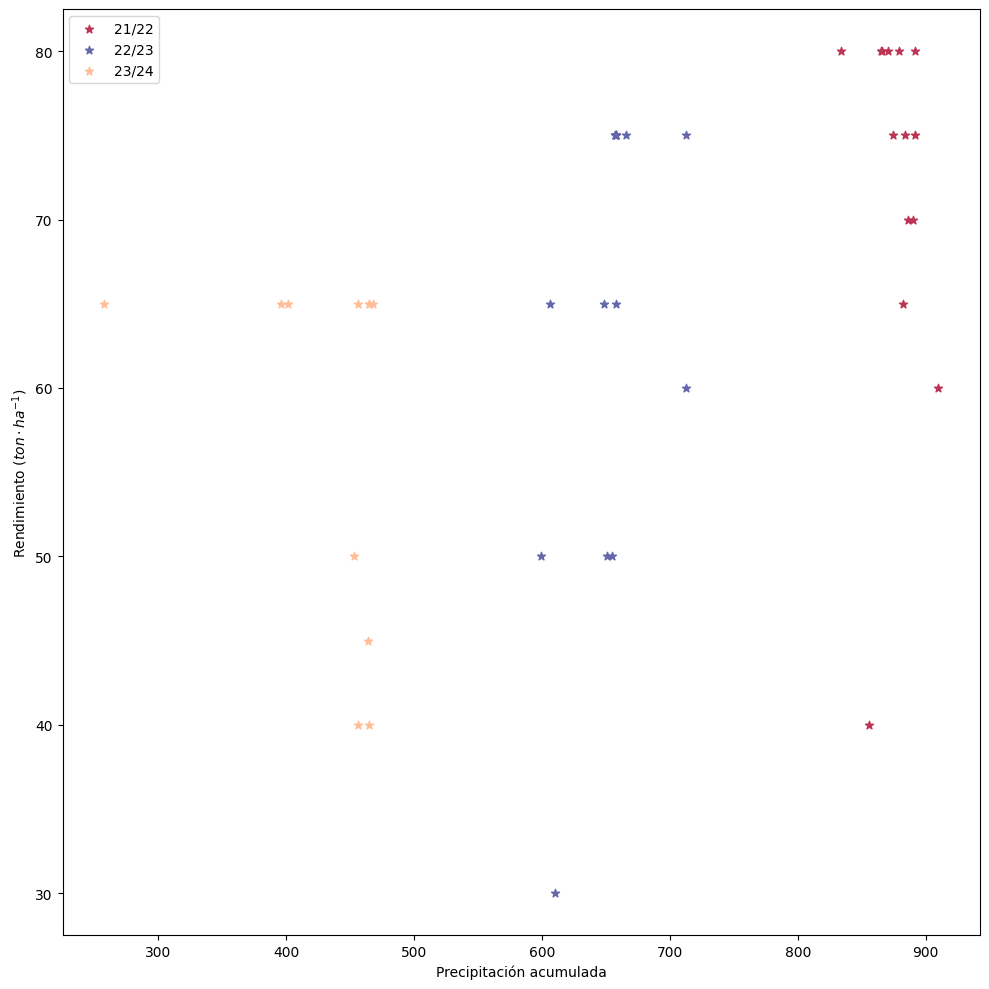

In [115]:
var_mod = 'lluvia_acum'
plt.figure(figsize=(10, 10))
#plt.scatter(z21_r[var_mod], z21_r['rendimiento'], color='#BE3455', label='21/22 reales')
#plt.scatter(z22_r[var_mod], z22_r['rendimiento'], color='#6667AB', label='22/23 reales')
#plt.scatter(z23_r[var_mod], z23_r['rendimiento'], color='#FFBE98', label='23/24 reales')
plt.scatter(z21_m[var_mod], z21_m['rendimiento'], color='#BE3455', label='21/22', marker='*')
plt.scatter(z22_m[var_mod], z22_m['rendimiento'], color='#6667AB', label='22/23', marker='*')
plt.scatter(z23_m[var_mod], z23_m['rendimiento'], color='#FFBE98', label='23/24', marker='*')
plt.xlabel('Precipitación acumulada')
plt.ylabel('Rendimiento ($ton \cdot ha^{-1}$)')
plt.tight_layout()
plt.legend()
plt.savefig(rf'../../tesis_img/correlacion/precip_acum_allseasons.pdf', dpi=150, format='pdf')
plt.show()

### Exportar datos

In [59]:
zafras_r.to_csv(r'../../results/yield_data/data/zafras_real.csv', index=False)

### Imagenes de corr

<>:6: SyntaxWarning: invalid escape sequence '\c'
<>:6: SyntaxWarning: invalid escape sequence '\c'
C:\Users\vival\AppData\Local\Temp\ipykernel_15140\2852514041.py:6: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('Rendimiento $ton \cdot ha^{-1}$')


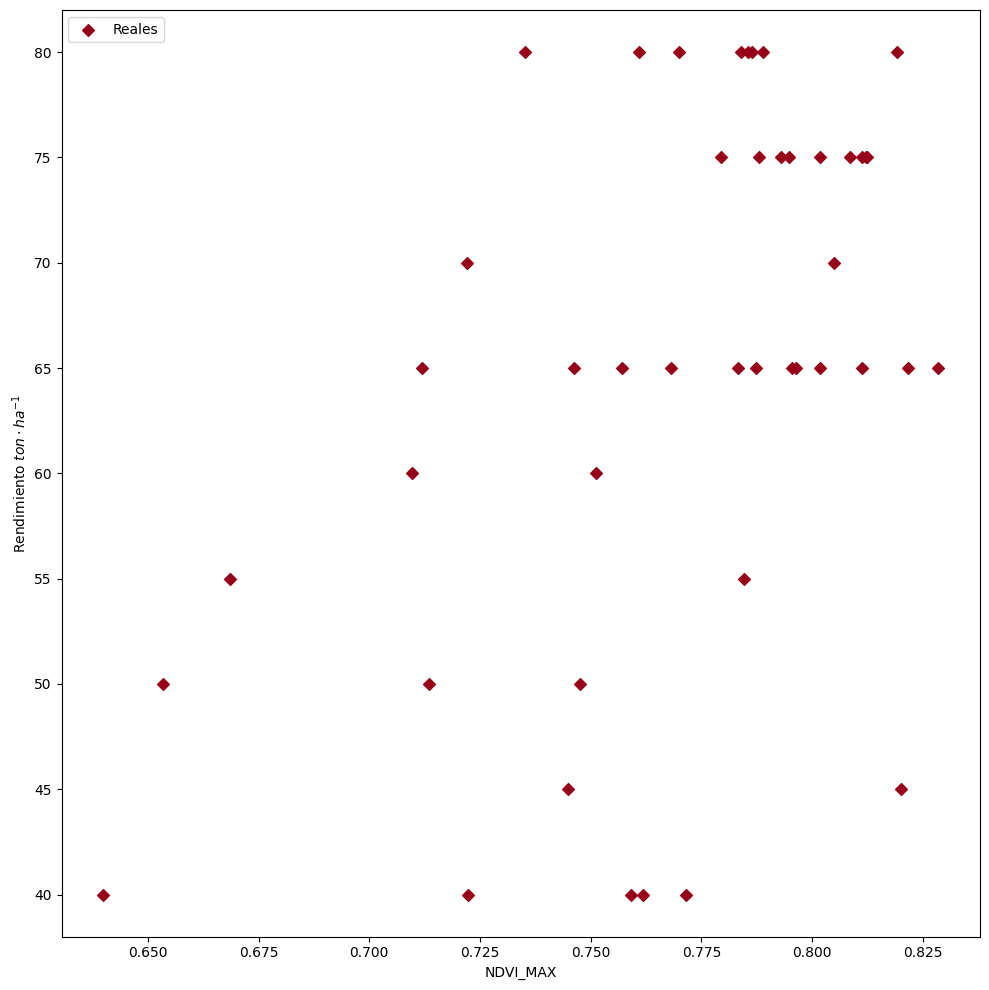

In [67]:
main_var = 'ndvi_max'
ds = zafras_r
plt.figure(figsize=(10, 10))
plt.scatter(ds[main_var], ds['rendimiento'], color=(150/255, 0, 24/255), label='Reales', marker='D')
plt.xlabel(f'{main_var.upper()}')
plt.ylabel('Rendimiento $ton \cdot ha^{-1}$')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig(rf'../../tesis_img/correlacion/{main_var}_juntos_rm.pdf', dpi=100, format='pdf')
plt.show()

## Lluvia vs rendimiento

In [13]:
lluvia22 = r'../../results/yield_data/data/zafra22_modelado.csv'
df_lluvia_22 = pd.read_csv(lluvia22)

In [14]:
df_lluvia_22

,parcela,ndvi_max,ndvi_mean,ndvi_max_date,gndvi_max,gndvi_mean,gndvi_max_date,cire_max,cire_mean,ndre1_max,ndre1_mean,msi_mean,lluvia_acum,etc_acum,rendimiento
0,1,0.648370,0.488700,2022-10-25,0.568826,0.469234,2022-10-25,1.504722,1.011174,0.364182,0.252466,1.078685,712.78,1303.357846,48
1,10,0.796569,0.629578,2022-10-05,0.660061,0.568226,2022-10-04,2.585846,1.781729,0.499120,0.365837,0.739836,658.18,1416.693989,75
2,11,0.810956,0.641030,2022-10-02,0.674904,0.571797,2022-09-30,2.731961,1.886138,0.511311,0.376820,0.710450,658.18,1440.542716,75
3,13,0.667301,0.533081,2022-11-11,0.555840,0.473664,2022-11-24,1.348722,1.026906,0.355861,0.273403,0.897377,650.70,1062.850123,30
4,14,0.702577,0.539736,2022-11-20,0.602871,0.499456,2022-11-28,1.910064,1.339574,0.415464,0.300529,0.897964,657.65,1310.372297,50
5,15,0.756904,0.596897,2022-11-29,0.622969,0.524896,2022-11-27,2.071538,1.507380,0.454218,0.342417,0.781567,599.52,1143.937378,60
6,16,0.611356,0.497741,2022-11-18,0.546131,0.467460,2022-11-25,1.194956,0.915952,0.322585,0.250844,1.051529,610.53,1004.052709,25
7,2,0.781416,0.614989,2022-11-21,0.646441,0.539353,2022-11-19,2.230023,1.615530,0.473186,0.355095,0.789692,606.51,1174.839983,60
8,3,0.676004,0.563202,2022-10-12,0.573794,0.505541,2022-10-19,1.648282,1.244270,0.387998,0.304666,0.847357,654.37,1293.898530,45
9,4,0.742868,0.575666,2022-11-27,0.630949,0.512232,2023-01-19,2.282957,1.524776,0.456968,0.332256,0.873138,648.12,1184.096700,50


In [ ]:
zafra2021 = zafra2021.drop(9)

In [ ]:
zafra2021

In [ ]:
to_concat_21 = []
for i in dfs_21:
    i[0]['Fecha'] = pd.to_datetime(i[0]['Fecha'])
    to_concat_21.append(i[0])
    
df_21 = pd.concat(to_concat_21, ignore_index=True, axis=0)

In [ ]:
to_concat_22 = []
for i in dfs_22:
    i[0]['Fecha'] = pd.to_datetime(i[0]['Fecha'])
    to_concat_22.append(i[0])
    
df_22= pd.concat(to_concat_22, ignore_index=True, axis=0)

In [ ]:
df_22.corr()

In [ ]:
juntos = pd.concat([zafra2021, zafra2022], ignore_index=True, axis=0)

In [ ]:
juntos.corr()

In [ ]:
juntos.corr(method='pearson')

In [ ]:
fechas = r"C:\Users\Isai\Documents\Tesis\code\fechas_claves\harvest.json"
fechas_df = pd.read_json(fechas)
fechas_df

In [ ]:
fechas_21 = pd.merge(fechas_df, zafra2021, left_on='id', right_on='parcela')

In [ ]:
fechas_juntos = pd.merge(fechas_21, zafra2022, left_on='parcela', right_on='parcela')

In [ ]:
fechas_juntos

## Correlación

In [ ]:
ids = juntos['parcela'].unique()
palette = sns.color_palette("hsv", len(ids))
var = 'ndvi_mean'

plt.figure(figsize=(10, 10))
sns.scatterplot(data=juntos, x=var, y='rendimiento', color='royalblue')
#plt.scatter(zafra2022['lluvia_acum'], zafra2022['rendimiento'])
plt.title(f'{var.split('_')[0].upper()}')
plt.tight_layout()
#plt.legend(title='Parcela')
# plt.text(0.9, 0.9, f'Correlación: {df2["ndvi"].corr(df2["Fecha"], method="pearson"):3f}', fontsize=12)
#plt.savefig(PurePath(r"C:\Users\Isai\Documents\Tesis\code\revision\img\juntos\corr", f'{var}_rendimiento_21.png'), dpi=300)
plt.show()

## Correlación entre vis y climaticos

In [ ]:
lr_z22 = r"C:\Users\Isai\Documents\Tesis\code\data_analysis\datos\model_predicts\zafra2022"
lr_z21 = r"C:\Users\Isai\Documents\Tesis\code\data_analysis\datos\model_predicts\zafra2021"

## Diferencia de fechas de cosecha

In [ ]:
fechas_juntos = fechas_juntos[['id', 'start', 'mid', 'end', 'ndvi_max_date_x', 'gndvi_max_date_x', 'ndvi_max_date_y', 'gndvi_max_date_y']]

In [ ]:
fechas_juntos['start'] = pd.to_datetime(fechas_juntos['start'])
fechas_juntos['mid'] = pd.to_datetime(fechas_juntos['mid'])
fechas_juntos['end'] = pd.to_datetime(fechas_juntos['end'])


In [ ]:
fechas_juntos

In [ ]:
fechas_juntos['dias_z21_ndvi'] = abs(fechas_juntos['ndvi_max_date_x'] - fechas_juntos['mid']).dt.days
fechas_juntos['dias_z21_gndvi'] = abs(fechas_juntos['gndvi_max_date_x'] - fechas_juntos['mid']).dt.days
fechas_juntos['dias_z22_ndvi'] = abs(fechas_juntos['ndvi_max_date_y'] - fechas_juntos['end']).dt.days
fechas_juntos['dias_z22_gndvi'] = abs(fechas_juntos['gndvi_max_date_y'] - fechas_juntos['end']).dt.days

In [ ]:
fechas_juntos

In [ ]:
plt.figure(figsize=(10, 5))

# Barra para la diferencia entre fecha2 y fecha1
plt.bar(fechas_juntos['id'], fechas_juntos['dias_z21_ndvi'], width=0.4, color='red', label='2022/2023', alpha=0.2)

# Barra para la diferencia entre fecha4 y fecha
plt.bar(fechas_juntos['id'], fechas_juntos['dias_z22_ndvi'], width=0.4, color='blue', alpha=0.15, label='2021/2022')

plt.xlabel('Parcela')
plt.ylabel('días')
plt.title('Max ndvi date vs harvest')
plt.legend()
plt.grid(True)

plt.tight_layout()
#plt.savefig(PurePath(r"C:\Users\Isai\Documents\Tesis\code\revision\img\juntos\corr", 'ndvi_harvest_dates_diff.png'), dpi=300)
plt.show()